<a href="https://colab.research.google.com/github/jayvyas91/Network-Anomaly-Detection/blob/main/NAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔢 Numeric Columns: ['duration', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag']
🔠 Categorical Columns: ['protocoltype', 'service', 'flag', 'attack']

📉 Missing Values:
Series([], dtype: int64)


<ipython-input-27-bd995e890f1f>:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x1000 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


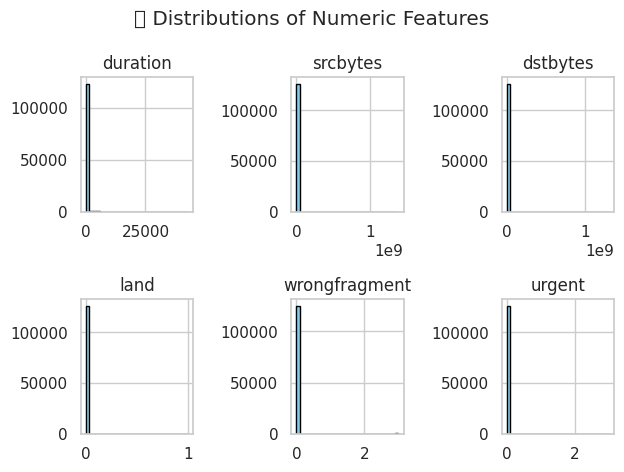

<ipython-input-27-bd995e890f1f>:36: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


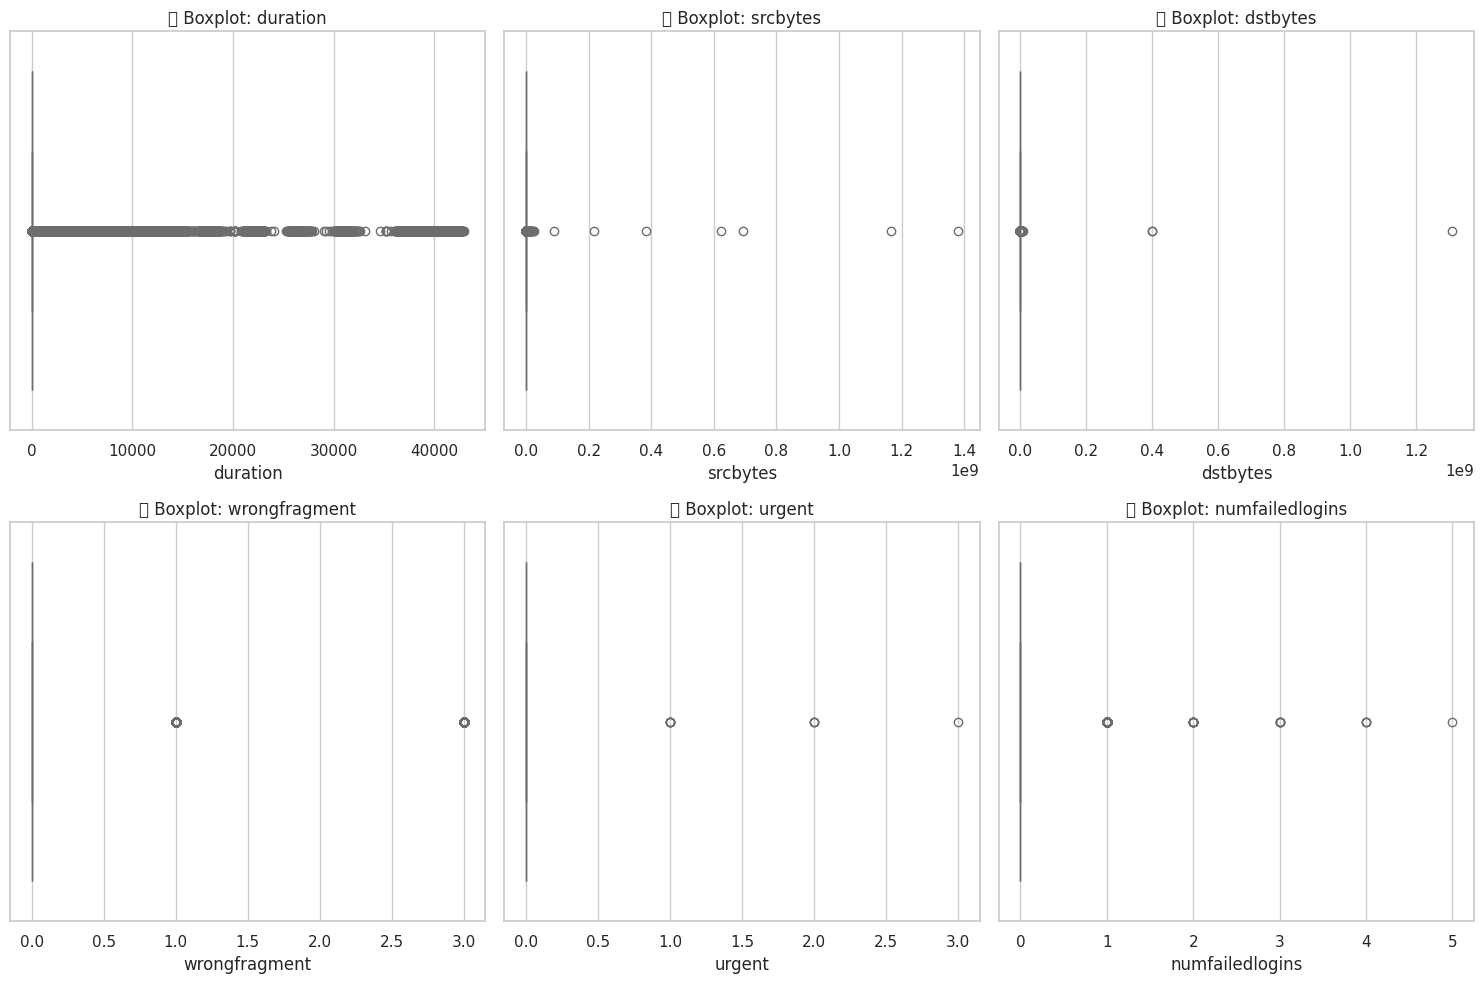


📋 Value counts for protocoltype:
 protocoltype
tcp             102689
udp              14993
icmp              8291
Name: count, dtype: int64

📋 Value counts for flag:
 flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
Name: count, dtype: int64

📋 Value counts for attack:
 attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
Name: count, dtype: int64


<ipython-input-27-bd995e890f1f>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_anomalous', y='numfailedlogins', data=df, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


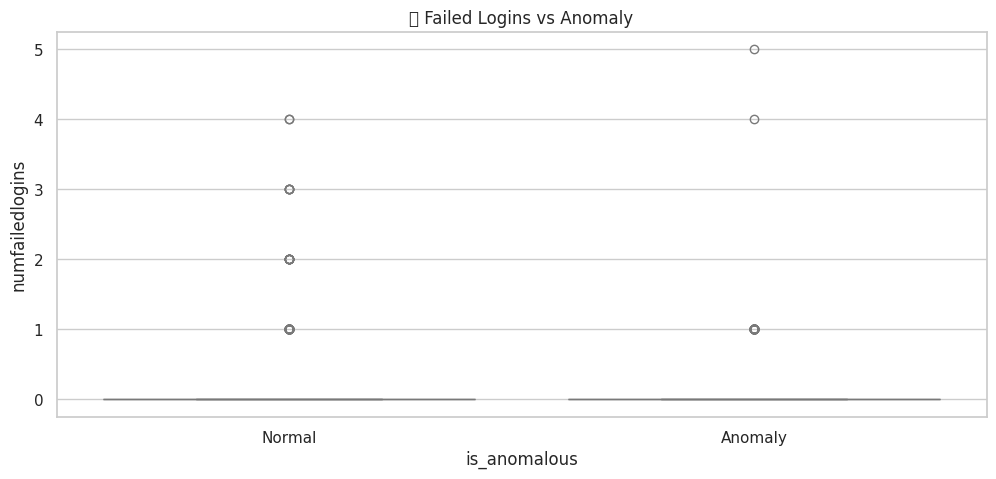

<ipython-input-27-bd995e890f1f>:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


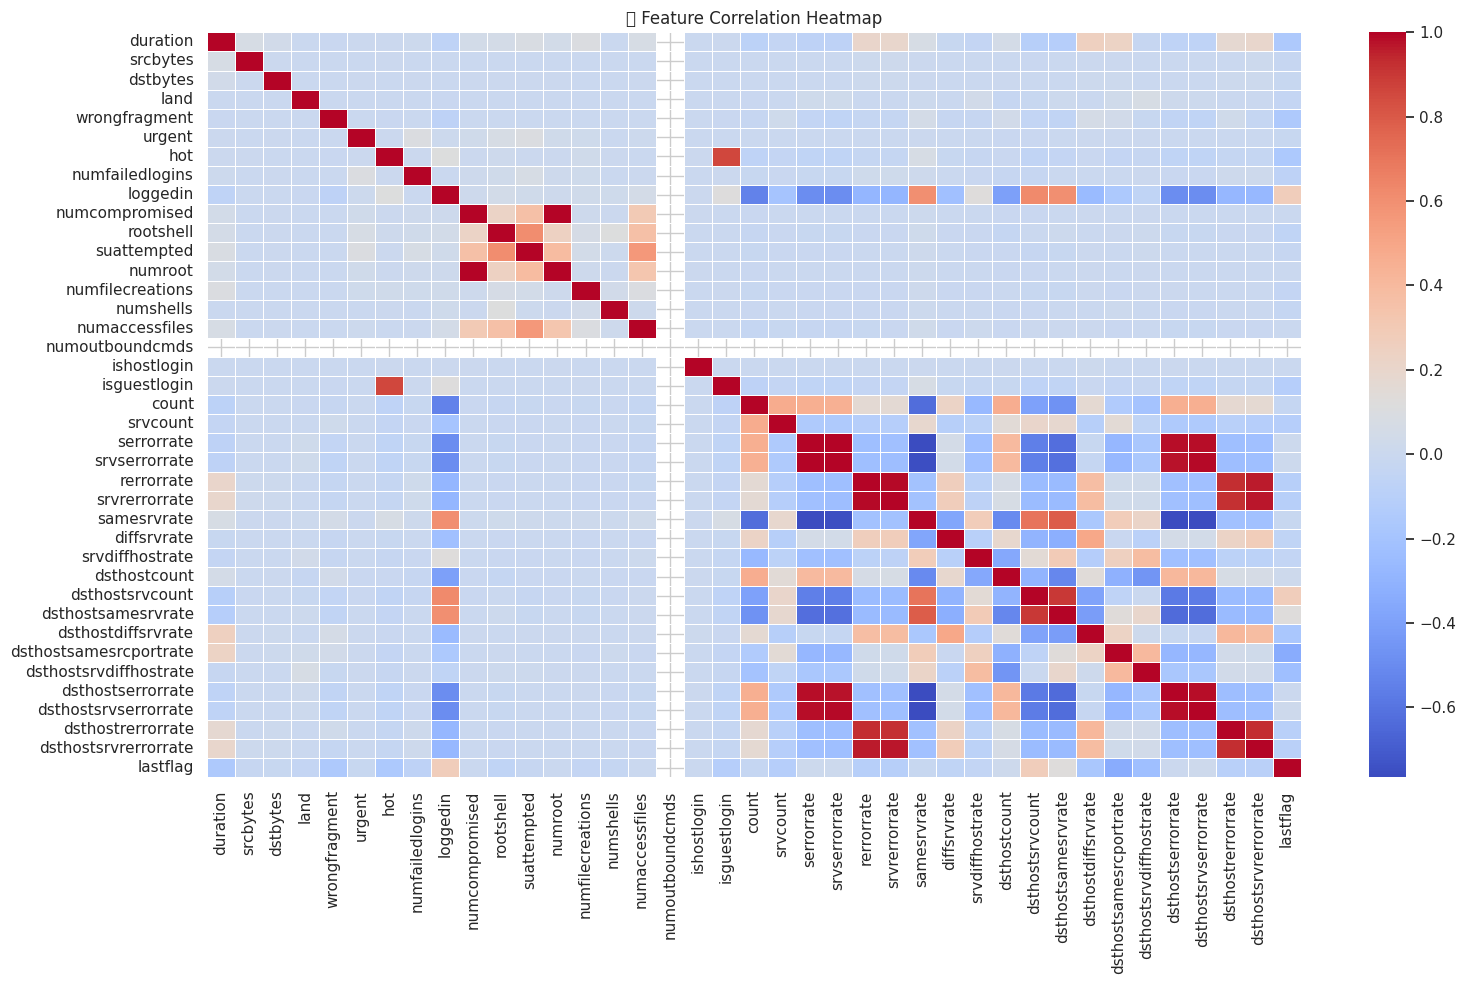


✅ Cleaned dataset exported for Tableau.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load & Clean Data ===
df = pd.read_csv('Network_anomaly_data.csv')
df.columns = df.columns.str.strip().str.lower()

# === 2. Analyze Data Types ===
numerics = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricals = df.select_dtypes(include=['object']).columns.tolist()

print("🔢 Numeric Columns:", numerics)
print("🔠 Categorical Columns:", categoricals)

# === 3. Missing Value Check ===
missing = df.isnull().sum()
print("\n📉 Missing Values:")
print(missing[missing > 0])

# === 4. Distribution Plots (Univariate EDA) ===
plt.figure(figsize=(14, 10))
df[numerics[:6]].hist(bins=30, color='skyblue', edgecolor='black', layout=(2, 3))
plt.suptitle("📊 Distributions of Numeric Features")
plt.tight_layout()
plt.show()

# === 5. Outlier Detection with Boxplots ===
features = ['duration', 'srcbytes', 'dstbytes', 'wrongfragment', 'urgent', 'numfailedlogins']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'📦 Boxplot: {col}')
plt.tight_layout()
plt.show()

# === 6. Categorical Value Counts (for Tableau filters) ===
for col in ['protocoltype', 'flag', 'attack']:
    print(f"\n📋 Value counts for {col}:\n", df[col].value_counts().head())

# === 7. Bivariate EDA (Login Attempts vs Anomaly) ===
df['is_anomalous'] = np.where(df['attack'].str.strip() == 'normal', 0, 1)

plt.figure(figsize=(12, 5))
sns.boxplot(x='is_anomalous', y='numfailedlogins', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.title("📉 Failed Logins vs Anomaly")
plt.show()

# === 8. Correlation Heatmap ===
plt.figure(figsize=(16, 10))
corr = df[numerics].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("📈 Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# === 9. Export CSV for Tableau ===
df.to_csv("cleaned_network_anomaly_data.csv", index=False)
print("\n✅ Cleaned dataset exported for Tableau.")